In [1]:
import sqlite3
conn = sqlite3.connect('../sql/producto.db')

c = conn.cursor()
print ('base de datos conectada')

base de datos conectada


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9924577ef0>)

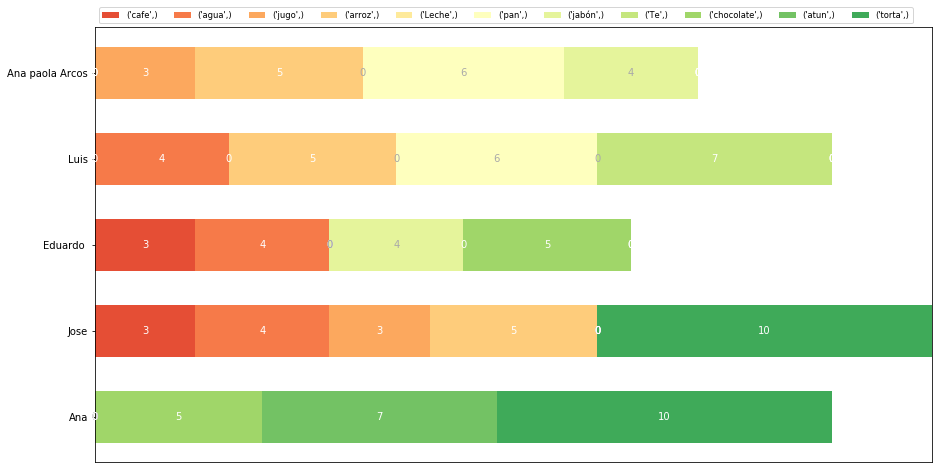

In [3]:
import numpy as np
import matplotlib.pyplot as plt

conn = sqlite3.connect('../sql/producto.db')
c = conn.cursor()

resutados_cliente_producto = c.execute("""SELECT c.nombre as cliente, p.nombre as producto, p.cantidad 
                      FROM custom_prod AS cp LEFT JOIN  customer as c on  c.id = cp.customer_id 
                      LEFT JOIN producto as p on cp.product_id = p.id""").fetchall()

productos = c.execute("SELECT nombre FROM producto").fetchall()
clientes = c.execute("SELECT nombre FROM customer").fetchall()
# Generador que convierte las tuplas en lista 
lista_todos_productos = [value[0] for value in productos]
# Inicalizar el diccionario con los clientes como llaves - None significa Nulo
cliente_producto = {}
results = {}
for cliente in clientes:
    cliente_producto[cliente[0]] = None
    results[cliente[0]] = None 
    # A todos los clientes asignar todos los productos con cantidad cero (inicialización)
for cliente in cliente_producto.keys():
    cliente_producto[cliente] = dict.fromkeys(lista_todos_productos, 0)
    """ 
La tupla clientes, productos, cantidad sigue los indices:
    - tupla[0] es Nombre del cliente
    - tupla[1] es Nombre del producto
    - tupla[2] es la Cantidad
"""
for value in resutados_cliente_producto:
    cliente_producto[value[0]][value[1]] = value[2]
    
    values_clientes = {}
    
for value,key in zip(cliente_producto.values(), cliente_producto.keys()):
    values_clientes[key] = list(value.values())
    
    
    

category_names = productos
results = values_clientes


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
    np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.6,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    plt.savefig("../static/image/productslista.png")

    return fig, ax


survey(results, category_names)

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

import glob
import os

dateTimeObj = datetime.now()
conn.row_factory = lambda cursor, row: row[0]
c = conn.cursor()
cantidad = c.execute('select cantidad value from producto').fetchall()


c = c.execute("SELECT nombre FROM producto")
lab =c.fetchall()

        
sizes = cantidad
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=lab,autopct='%1.0f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  


timeStr = dateTimeObj.strftime("%H:%M:%S")
print('Current Timestamp : '+ timeStr)


filelist=glob.glob("../static/image/*.png")
for file in filelist:
    os.remove(file)
    
nombre = "products" + timeStr +".png"
plt.savefig("../static/image/"+ nombre)
print(nombre)
plt.show()



In [ ]:
path

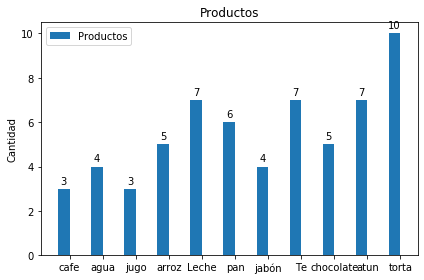

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

conn.row_factory = lambda cursor, row: row[0]
c = conn.cursor()
cantidad = c.execute('select cantidad value from producto').fetchall()
c = c.execute("SELECT nombre FROM producto")
lab =c.fetchall()
labels = lab
products = cantidad
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, products, width, label='Productos')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad')
ax.set_title('Productos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
    xy=(rect.get_x() + rect.get_width() / 2, height),
    xytext=(0, 3),  # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom')
    fig.tight_layout()
    plt.savefig("../static/image/productsb.png")



In [ ]:
  sentencia = "DELETE FROM producto WHERE id = ?;"
        c.execute(sentencia, [id])

In [ ]:

import os 
  

file = 'products10:40:34.png'
  

location = "../static/image/"
  

path = os.path.join(location, file) 
  
os.remove(path) 
print("%s has been removed successfully" %file) 



